In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline


In [2]:
ufo=pd.read_csv('ufo_sighting_data.csv')
ufo.head()

C:\Users\Jay Patel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


# 1. Write a Pandas program to create the todays date.

In [3]:
from datetime import datetime
datetime.now()

datetime.datetime(2022, 1, 18, 4, 36, 33, 767550)

In [4]:
now=pd.to_datetime(datetime.today(),format='%Y %m %d %H:%M:%S')
now

Timestamp('2022-01-18 04:36:33.825410')

# 2. Write a Pandas program to calculate all the sighting days of the unidentified flying object (ufo) from current date.

In [5]:
ufo['date_documented']

0         4/27/2004
1        12/16/2005
2         1/21/2008
3         1/17/2004
4         1/22/2004
            ...    
80327     9/30/2013
80328     9/30/2013
80329     9/30/2013
80330     9/30/2013
80331     9/30/2013
Name: date_documented, Length: 80332, dtype: object

In [6]:
ufo.dtypes

Date_time                           object
city                                object
state/province                      object
country                             object
UFO_shape                           object
length_of_encounter_seconds         object
described_duration_of_encounter     object
description                         object
date_documented                     object
latitude                            object
longitude                          float64
dtype: object

In [7]:
ufo[['Date_time','length_of_encounter_seconds','described_duration_of_encounter','date_documented']]=ufo[['Date_time','length_of_encounter_seconds','described_duration_of_encounter','date_documented']].apply(pd.to_datetime)

ParserError: hour must be in 0..23: 10/11/2006 24:00

- The reason why this does not work is because the %H parameter only accepts values in the range of 00 to 23 (both inclusive). This thus means that 24:00 is - like the error says - not a valid time string.

- therefore we have not much other options than convert the string to a valid format. We can do this by first replacing 24:00 with 00:00, and then later increment the day for these timestamps.

In [8]:
ufo['Date_time'] = ufo['Date_time'].str.replace('24:00', '0:00')
ufo['Date_time']

0        10/10/1949 20:30
1        10/10/1949 21:00
2        10/10/1955 17:00
3        10/10/1956 21:00
4        10/10/1960 20:00
               ...       
80327      9/9/2013 21:15
80328      9/9/2013 22:00
80329      9/9/2013 22:00
80330      9/9/2013 22:20
80331      9/9/2013 23:00
Name: Date_time, Length: 80332, dtype: object

In [9]:
ufo['Date_time'] = pd.to_datetime(ufo['Date_time'], format='%m/%d/%Y %H:%M')
ufo['Date_time'].head()

0   1949-10-10 20:30:00
1   1949-10-10 21:00:00
2   1955-10-10 17:00:00
3   1956-10-10 21:00:00
4   1960-10-10 20:00:00
Name: Date_time, dtype: datetime64[ns]

In [10]:
# add one day where applicable
ufo['Date_time'] += pd.DateOffset(days=1)
ufo['Date_time'].head()
# 1989-10-10 00:00:00

0   1949-10-11 20:30:00
1   1949-10-11 21:00:00
2   1955-10-11 17:00:00
3   1956-10-11 21:00:00
4   1960-10-11 20:00:00
Name: Date_time, dtype: datetime64[ns]

https://sparkbyexamples.com/pandas/pandas-convert-multiple-columns-to-datetime-type/

- convert multiple columns from string, integer, and object to DataTime (date & time) type using pandas.to_datetime(), DataFrame.apply() & astype() functions. Usually, we get Data & time from the sources in different formats and in different data types, by using these functions you can convert them to a data time type datetime64[ns] of pandas.

In [11]:
ufo[['length_of_encounter_seconds','described_duration_of_encounter','date_documented']]=ufo[['length_of_encounter_seconds','described_duration_of_encounter','date_documented']].apply(pd.to_datetime,errors='coerce')

In [12]:
ufo.dtypes

Date_time                          datetime64[ns]
city                                       object
state/province                             object
country                                    object
UFO_shape                                  object
length_of_encounter_seconds        datetime64[ns]
described_duration_of_encounter            object
description                                object
date_documented                    datetime64[ns]
latitude                                   object
longitude                                 float64
dtype: object

# Coercion:
- Coercion: is the implicit conversion of an instance of one type to another during an operation which involves two arguments of the same type. For example, in 3+4.5, each argument is of a different type (one int, one float), and both must be converted to the same type before they can be added or it will raise a TypeError. Coercion between two operands can be performed with the coerce built-in function; thus, 3+4.5 is equivalent to calling operator.add(*coerce(3, 4.5)) and results in operator.add(3.0, 4.5). Without coercion, all arguments of even compatible types would have to be normalized to the same value by the programmer, e.g., float(3)+4.5 rather than just 3+4.5. If coercion is not possible, coerce raises TypeError. Use of the coerce function is in not really necessary since Python’s interpreter automatically normalizes values in arithmetic expressions.

# Dateoffset:
- https://www.plus2net.com/python/pandas-dt-dateoffset.php
- https://towardsdatascience.com/python-pandas-gives-you-full-control-over-timestamps-10fe26c96a9e

3. Write a Pandas program to get the current date, oldest date and number of days between Current date and oldest date of Ufo dataset.

In [13]:
print("\nCurrent date of Ufo dataset:")
print(ufo.Date_time.max())
print("\nOldest date of Ufo dataset:")
print(ufo.Date_time.min())
print("\nNumber of days between Current date and oldest date of Ufo dataset:")
print((ufo.Date_time.max() - ufo.Date_time.min()).days)



Current date of Ufo dataset:
2014-05-09 18:45:00

Oldest date of Ufo dataset:
1906-11-12 00:00:00

Number of days between Current date and oldest date of Ufo dataset:
39260


4. Write a Pandas program to get all the sighting days of the unidentified flying object (ufo) which are less than or equal to 40 years (365*40 days).

In [14]:
ufo.shape

(80332, 11)

In [15]:
from datetime import datetime, timedelta
duration = timedelta(days=365*40)
duration

datetime.timedelta(days=14600)

In [16]:
now

Timestamp('2022-01-18 04:36:33.825410')

In [17]:
print("\nSighting days of the unidentified flying object (ufo) which are less than or equal to 40 years (365*40 days):")
df =  ufo[now - ufo['Date_time'] <= duration]
df


Sighting days of the unidentified flying object (ufo) which are less than or equal to 40 years (365*40 days):


,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
35,1982-10-11 07:00:00,gisborne (new zealand),NaN,NaN,disk,NaT,NaT,gisborne nz 1982 wainui beach to sponge bay,2002-01-11,-38.662334,178.017649
36,1984-10-11 05:00:00,houston,tx,us,circle,NaT,NaT,2 experience with unkown,2012-04-18,29.7630556,-95.363056
37,1984-10-11 12:00:00,traverse city,mi,us,other,NaT,NaT,translucent football seen over city airport,2003-10-07,44.7630556,-85.620556
38,1984-10-11 22:00:00,white plains,ny,us,formation,NaT,NaT,Saw a hugh object in sky with lights intermitt...,1999-08-10,41.0338889,-73.763333
39,1985-10-11 20:25:00,leeds (uk/england),NaN,gb,triangle,NaT,NaT,three light in the sky that led to a big black...,2003-03-04,53.8,-1.583333
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-10 21:15:00,nashville,tn,us,light,1970-01-01 00:00:00.000000600,NaT,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
80328,2013-09-10 22:00:00,boise,id,us,circle,1970-01-01 00:00:00.000001200,NaT,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500
80329,2013-09-10 22:00:00,napa,ca,us,other,1970-01-01 00:00:00.000001200,NaT,Napa UFO&#44,2013-09-30,38.297222,-122.284444
80330,2013-09-10 22:20:00,vienna,va,us,circle,1970-01-01 00:00:00.000000005,NaT,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556


5. Write a Pandas program to get all the sighting days of the unidentified flying object (ufo) between 1950-10-10 and 1960-10-10.

In [18]:
selected_period = ufo[(ufo['Date_time'] >= '1950-01-01 00:00:00') & (ufo['Date_time'] <= '1960-12-31 23:59:59')]
selected_period

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
2,1955-10-11 17:00:00,chester (uk/england),NaN,gb,circle,NaT,NaT,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667
3,1956-10-11 21:00:00,edna,tx,us,circle,NaT,NaT,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833
4,1960-10-11 20:00:00,kaneohe,hi,us,light,NaT,NaT,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611
479,1950-10-02 11:00:00,pikeville,ky,us,disk,NaT,NaT,SEVENTY SOME FLYING DISK OBSERVED IN 1950,2005-04-16,37.4791667,-82.518889
480,1952-10-02 03:30:00,fukuoka (japan),NaN,NaN,disk,NaT,NaT,UFO seen by multiple U. S. military personnel;...,2006-12-07,33.590355,130.401716
...,...,...,...,...,...,...,...,...,...,...,...
79262,1960-09-06 21:00:00,buffalo,ny,us,oval,1970-01-01 00:00:00.000000180,NaT,Precise movements of a &quot;craft&quot; appar...,2005-09-15,42.886389,-78.878611
79668,1958-09-08 19:00:00,arthur,nd,us,unknown,1970-01-01 00:00:00.000000900,NaT,Two lights of alternating color traveling and ...,2003-10-31,47.104167,-97.217778
80101,1952-09-10 20:00:00,philadelphia,pa,us,circle,1970-01-01 00:00:00.000000180,NaT,saucers in a line over Phila Pa.,2009-12-12,39.952222,-75.164167
80102,1954-09-10 12:30:00,beaumont,tx,us,disk,1970-01-01 00:00:00.000000300,NaT,Aprox. 30 Disk shaped UFOs fell out of clouds ...,2004-01-17,30.085833,-94.101667


6. Write a Pandas program to get all the sighting years of the unidentified flying object (ufo) and create the year as column. 

In [19]:
import datetime as dt
ufo['years_of_encounter']=ufo['Date_time'].dt.year
ufo['years_of_encounter']

0        1949
1        1949
2        1955
3        1956
4        1960
         ... 
80327    2013
80328    2013
80329    2013
80330    2013
80331    2013
Name: years_of_encounter, Length: 80332, dtype: int64

7. Write a Pandas program to create a plot to present the number of unidentified flying object (UFO) reports per year.

In [20]:
ufo.head(1)

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude,years_of_encounter
0,1949-10-11 20:30:00,san marcos,tx,us,cylinder,NaT,NaT,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111,1949


In [21]:
ufo.pivot_table(ufo,index='years_of_encounter',aggfunc={'years_of_encounter':'count'})

,years_of_encounter
years_of_encounter,
1906,1
1910,2
1916,1
1920,1
1925,1
...,...
2010,4278
2011,5077
2012,7345


8. Write a Pandas program to extract year, month, day, hour, minute, second and weekday from unidentified flying object (UFO) reporting date.

In [22]:
import datetime as dt
ufo['month_of_encounter']=ufo['Date_time'].dt.month
ufo['day_of_encounter']=ufo['Date_time'].dt.day
ufo['hour_of_encounter']=ufo['Date_time'].dt.hour

In [23]:
ufo['second_of_encounter']=ufo['Date_time'].dt.second
ufo['weekday_of_encounter']=ufo['Date_time'].dt.weekday

In [24]:
ufo['weekday_of_encounter']=ufo['Date_time'].dt.week


<ipython-input-24-1de1411cb378>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  ufo['weekday_of_encounter']=ufo['Date_time'].dt.week


In [25]:
ufo.dtypes

Date_time                          datetime64[ns]
city                                       object
state/province                             object
country                                    object
UFO_shape                                  object
length_of_encounter_seconds        datetime64[ns]
described_duration_of_encounter            object
description                                object
date_documented                    datetime64[ns]
latitude                                   object
longitude                                 float64
years_of_encounter                          int64
month_of_encounter                          int64
day_of_encounter                            int64
hour_of_encounter                           int64
second_of_encounter                         int64
weekday_of_encounter                        int64
dtype: object

9. Write a Pandas program to convert given datetime to timestamp.

10. Write a Pandas program to count year-country wise frequency of reporting dates of unidentified flying object(UFO).

In [31]:
ufo['years_of_encounter']=ufo['Date_time'].apply(pd.to_datetime)

In [33]:
#incorrect
ufo.pivot_table(ufo,index='years_of_encounter',columns='country',aggfunc={'years_of_encounter':'count'})

years_of_encounter                 
country                             au  ca  de  gb   us
years_of_encounter                                     
1910-01-02 00:00:00                NaN NaN NaN NaN  1.0
1910-06-02 15:00:00                NaN NaN NaN NaN  1.0
1920-06-12 21:00:00                NaN NaN NaN NaN  1.0
1925-12-29 18:00:00                NaN NaN NaN NaN  1.0
1929-07-06 14:00:00                NaN NaN NaN NaN  1.0
...                                ...  ..  ..  ..  ...
2014-05-08 21:00:00                NaN NaN NaN NaN  1.0
2014-05-08 21:10:00                NaN NaN NaN NaN  1.0
2014-05-08 21:20:00                NaN NaN NaN NaN  1.0
2014-05-09 00:00:00                NaN NaN NaN NaN  1.0
2014-05-09 18:45:00                1.0 NaN NaN NaN  NaN

[61669 rows x 5 columns]

11. Write a Pandas program to extract unique reporting dates of unidentified flying object (UFO).

In [ ]:
ufo['date_documented'].unique()

In [ ]:
ufo["Date_time"].map(lambda t: t.date()).unique()


12. Write a Pandas program to get the difference (in days) between documented date and reporting date of unidentified flying object (UFO). 

In [ ]:
ufo['Difference'] = (ufo['date_documented'] - ufo['Date_time']).dt.days
ufo.head(1)

13. Write a Pandas program to add 100 days with reporting date of unidentified flying object (UFO).

In [ ]:
ufo['100days_forward']=ufo['Date_time']+ pd.DateOffset(days=100)

In [ ]:
ufo['100DY_FORW']=ufo['Date_time'].dt.day + 100
ufo[['100DY_FORW','Date_time','100days_forward']]

14. Write a Pandas program to generate sequences of fixed-frequency dates and time spans.

In [ ]:
dtr = pd.date_range('2018-01-01', periods=12, freq='H')
print("Hourly frequency:")
print(dtr)
dtr = pd.date_range('2018-01-01', periods=12, freq='min')
print("\nMinutely frequency:")
print(dtr)
dtr = pd.date_range('2018-01-01', periods=12, freq='S')
print("\nSecondly frequency:")
print(dtr)
dtr = pd.date_range('2018-01-01', periods=12, freq='2H')
print("\n2 Hourly frequency:")
print(dtr)
dtr = pd.date_range('2018-01-01', periods=12, freq='5min')
print("\n5  Minute frequency:")
print(dtr)
dtr = pd.date_range('2018-01-01', periods=12, freq='BQ')
print("\nbusiness quarter frequency:")
print(dtr)
dtr = pd.date_range('2018-01-01', periods=12, freq='w')
print("\nWeekly frequency:")
print(dtr)
dtr = pd.date_range('2018-01-01', periods=12, freq='2h20min')
print("\nCombine together day and intraday offsets-1:")
print(dtr)
dtr = pd.date_range('2018-01-01', periods=12, freq='1D10U')
print("\nCombine together day and intraday offsets-2:")
print(dtr)

15. Write a Pandas program to create a conversion between strings and datetime.

In [ ]:
from dateutil.parser import parse
print("Convert datatime to strings:")
stamp=datetime(2019,7,1)
print(stamp.strftime('%Y-%m-%d'))
print(stamp.strftime('%d/%b/%y'))
print("\nConvert strings to datatime:")
print(parse('Sept 17th 2019'))
print(parse('1/11/2019'))
print(parse('1/11/2019', dayfirst=True))

In [ ]:
ufo['Date_time']

In [ ]:
ufo["Date_time"] + pd.Timedelta(value=1, unit="W")

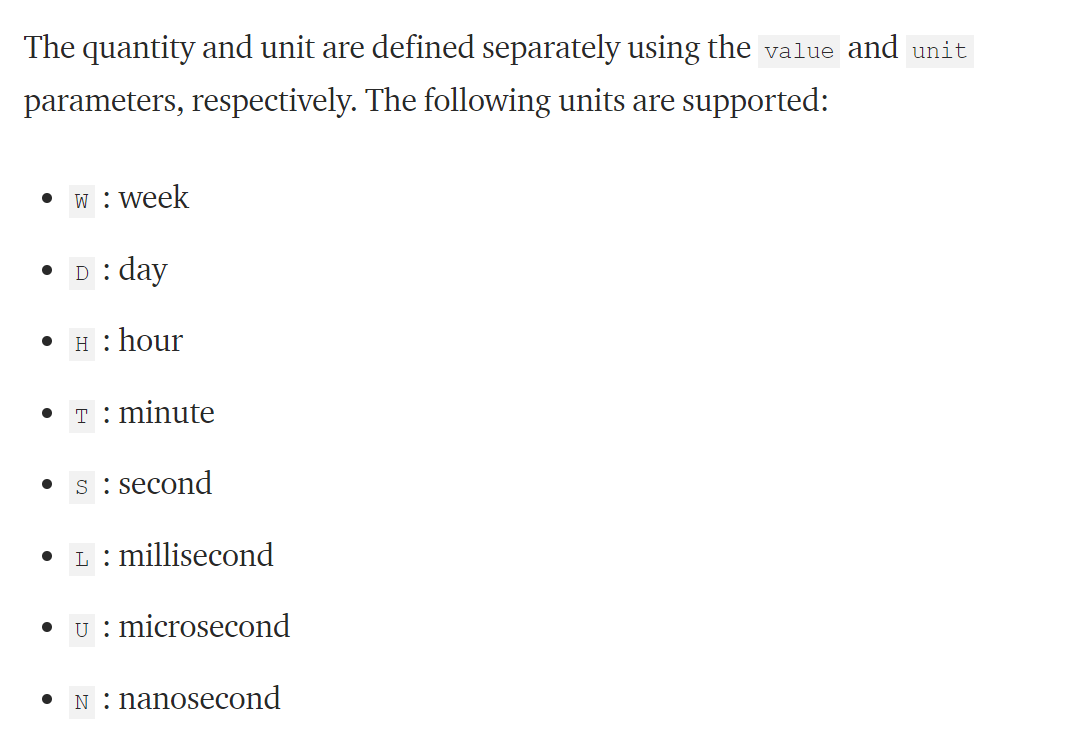

Timedelta: https://towardsdatascience.com/python-pandas-gives-you-full-control-over-timestamps-10fe26c96a9e

16. Write a Pandas program to manipulate and convert date times with timezone information

In [ ]:
dtt = pd.date_range('2018-01-01', periods=3, freq='H')
dtt

In [ ]:
dtt.tz_convert('America/Los_Angeles')

In [ ]:
#dtt = dtt.tz_localize('UTC')
dtt.tz_convert('US/Central')

17. Write a Pandas program to get the average mean of the UFO (unidentified flying object) sighting was reported.

In [ ]:
ufo

In [ ]:
ufo['instance'] = 1


In [ ]:
ufo

In [ ]:
ufo.set_index(ufo['date_documented'], drop=True, inplace=True)
ufo

In [ ]:
ufo2 = pd.DataFrame(ufo['instance'].resample('M'))
ufo2


In [ ]:
# Add a new column instance, this adds a value to each instance of ufo sighting
ufo['instance'] = 1

# set index to time, this makes df a time series df and then you can apply pandas time series functions.
ufo.set_index(ufo['date_documented'], drop=True, inplace=True)

# create another df by resampling the original df and counting the instance column by Month ('M' is resample by month)
ufo2 = pd.DataFrame(ufo['instance'].resample('M').count())

# just to find month of resampled observation
ufo2['date_documented'] = pd.to_datetime(ufo2.index.values)

ufo2['month'] = ufo2['date_documented'].apply(lambda x: x.month)
print("Average mean of  the UFO (unidentified flying object) sighting was reported:")
print(ufo2.groupby(by='month').mean())

18. Write a Pandas program to create a plot of distribution of UFO (unidentified flying object) observation time

In [ ]:
ufo.head(1)

In [ ]:
ufo.dtypes

In [ ]:
import seaborn as sns
sns.distplot(a=ufo['Date_time'],bins=30)

Write a Pandas program to create a comparison of the top 10 years in which the UFO was sighted vs the hours of the day

In [26]:
ufo['years_of_encounter']=ufo['Date_time'].apply(pd.to_datetime)
ufo['years_of_encounter'].unique()


array(['1949-10-11T20:30:00.000000000', '1949-10-11T21:00:00.000000000',
       '1955-10-11T17:00:00.000000000', ...,
       '2013-09-10T22:00:00.000000000', '2013-09-10T22:20:00.000000000',
       '2013-09-10T23:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
ufo.groupby('years_of_encounter')['years_of_encounter'].count()

In [ ]:
ufo.pivot_table(ufo,index='years_of_encounter',columns='country',aggfunc={'years_of_encounter':'count'}).head(10)

In [ ]:
ufo.dtypes

In [ ]:
ufo[['years_of_encounter']]=ufo[['years_of_encounter']].apply(pd.to_datetime,errors='coerce')

In [ ]:
ufo['years_of_encounter']

22. Write a Pandas program to create a comparison of the top 10 years in which the UFO was sighted vs the hours of the day

23. Write a Pandas program to create a comparison of the top 10 years in which the UFO was sighted vs each Month

24. Write a Pandas program to create a heatmap (rectangular data as a color-encoded matrix) for comparison of the top 10 years in which the UFO was sighted vs each Month.

25. Write a Pandas program to create a Timewheel of Hour Vs Year comparison of the top 10 years in which the UFO was sighted. 